#### Пример №3. Уравнение эллиптического типа
$$
\begin{cases}\frac{\partial^{2}u}{\partial x^{2}} + \frac{\partial^{2}u}{\partial y^{2}} = 0\\u(0, y) = y\\u(1, y) = 1+ y\\u(x, 0) = x\\u(x, 1) = 1+ x\end{cases} 
$$
Аналитическое решение: $u(x,t) = x + y$ <br>
Для решения начально-краевой задачи, в данной работе, используется метод сеток.

Вводим граничные условия:
$$u(0, y) = y,\:u(1, y) = 1 + y,\:y \in [0, 1]$$
$$u(x, 0) = x,\:u(x, 1) = 1 + x,\:x \in [0, 1]$$
Условия непрерывности функции $u(x, y)$ на границе области D
$$f_{1}(0) = f_{3}(0),\:f_{1}(1) = f_{4}(0),$$
$$f_{2}(0) = f_{3}(1),\:f_{2}(1) = f_{4}(1).$$
Построение сетки:
шаг сетки $\Delta x, \Delta y$<br>
координаты узлов сетки
$$x_{i} = i \Delta x, i = 0,1,...,n,\:y_{i} = i \Delta y, j = 0,1,...,m,$$
$$x_{n} = n \Delta x = a, y_{m} = m \Delta y = b.$$
значение функции
$$u_{i,j} = u(x_{i}, y_{j})$$
Аппроксимация частных производных:
$$\frac{\partial^{2} u}{\partial x^{2}} = \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{\Delta x^{2}} + O(\Delta x^{2})$$
$$\frac{\partial^{2} u}{\partial y^{2}} = \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{\Delta y^{2}} + O(\Delta y^{2})$$
Конечно-разностное уравнение Лапласа
$$\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{\Delta x^{2}} = \frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{\Delta y^{2}}$$
$$i = 1,...,n-1;\: j = 1,...,m-1.$$

Система линейных алгебраических уравнений $\Delta x = \Delta y$ <br>
$$u_{i,j} = \frac{u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}}{4},$$
$$u_{i,0} = f_{3}(x_{i}),\:u_{i,m} = f_{4}(x_{i}),$$
$$u_{0,j} = f_{1}(y_{i}),\:u_{n,j} = f_{2}(y_{i}),$$
$$i = 1,...,n-1;\: j = 1,...,m-1.$$
Численное решение задачи состоит в нахождении приближенных значений $u_{i,j}$ искомой функции $u(x, y)$ во внутренних узлах сетки.
Набор узлов, используемых для аппроксимации уравнения в точке, называется шаблоном.
$$u_{i,j} = \frac{u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}}{4}$$
![scheme](img/2.jpg)
Итерационный метод Гаусса-Зейделя
$$u_{i,j}^{(s+1)} = \frac{u_{i-1,j}^{(s+1)}+u_{i+1,j}^{(s)}+u_{i,j+1}^{(s)}+u_{i,j-1}^{(s+1)}}{4}$$
Условие окончания итерационного процесса
$$max_{i,j} |u_{i,j}^{(s+1)}-u_{i,j}^{(s)}| \leq \varepsilon,$$
$$1 \leq i \leq n - 1, \: 1 \leq j \leq m - 1 $$
Итерационный процесс сходится медленно <br>
Более надёжный критерий 
$$max_{i,j} | u_{i,j}^{(s+1)}-u_{i,j}^{(s)}| \leq \varepsilon (1-a), \:\: a = \frac{max_{i,j}|u_{i,j}^{(s+1)}-u_{i,j}^{(s)}|}{max_{i,j}|u_{i,j}^{(s)}-u_{i,j}^{(s-1)}|}$$
Погрешность приближенного решения:<br>
* Погрешность аппроксимации дифференциального уравнения разностным уравнением;
* Погрешность, возникающая в результате приближенного решения системы разностных уравнений.<br>

Свойство используемой разностной схемы:<br>

* Свойство устойчивости
* Свойство сходимости.<br>

Устойчивость схемы означает, что малые изменения в начальных данных приводят к малым изменениям решения разностной задачи.<br>
Сходимость схемы означает, что при стремлении шага сетки к нулю решение разностной задачи стремится к решению исходной задачи.<br>

Алгоритм решения задачи
1. Задание шага
2. Задание граничных условий
3. Задание начального приближения 
$$u_{i,j}^{(0)} = 1, \: i = 1,...,n-1;\:j = 1,...,m-1.$$
4. Уточнение решения
$$u_{i,j}^{(s+1)} = \frac{u_{i-1,j}^{(s+1)}+u_{i+1,j}^{(s)}+u_{i,j+1}^{(s)}+u_{i,j-1}^{(s+1)}}{4}$$
$$i = 1,...,n-1;$$
$$j= = 1,...,m-1;$$
5. Проверка условия окончания итерационного процесса
$$max_{i,j}|u_{i,j}^{(s+1)}-u_{i,j}^{(s)}| \leq \varepsilon (1-a),\:\: a = \frac{max_{i,j}|u_{i,j}^{(s+1)}-u_{i,j}^{(s)}|}{max_{i,j}|u_{i,j}^{(s)}-u_{i,j}^{(s-1)}|}$$

In [2]:
# Подключаем необходимые библиотеки
import numpy as np
from IPython.display import HTML
from matplotlib import animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import fabs

In [92]:
## МОДЕЛИРОВАННОЕ РЕШЕНИЕ
dx = 0.1
dy = 0.1
eps = 0.001

longer = 11

otv = np.ones((longer, longer)) ## np.ones потому что берём 1 как 
otv1 = np.ones((longer, longer)) ## начальное приближение Гаусса-Зёйделя
otv2 = np.ones((longer, longer))

for i in range(1, 10):
    otv[0][i] = round(i*dx, 1)
    otv1[0][i] = round(i*dx, 1)
    otv[10][i] = round((i*dx)+1, 1)
    otv1[10][i] = round((i*dx)+1, 1)
    
for i in range(0, 11):
    otv[i][0] = round(i*dy, 1)
    otv1[i][0] = round(i*dy, 1)
    otv[i][10] = round((i*dy)+1, 1)
    otv1[i][10] = round((i*dy)+1, 1)

    
for i in range(1, 10):
    for j in range(1, 10):
        otv1[i][j] = (otv1[i][j-1]+otv1[i-1][j]+otv[i+1][j]+otv[i][j+1])/4
        
## НАХОДИМ МАКСИМАЛЬНОЕ РАСХОЖДЕНИЕ С ПРЕДЫДУЩЕЙ ИТЕРАЦИЕЙ
maxotv = 0
for i in range(1, 10):
    for j in range(1, 10):
        if fabs(otv1[i][j]-otv[i][j]) > maxotv:
            maxotv = fabs(otv1[i][j]-otv[i][j])
##

for i in range(1, 10):
    for j in range(1, 10):
        otv[i][j] = otv1[i][j] ## СОХРАНЯЕМ ЗНАЧЕНИЕ ТЕКУЩЕЙ ИТЕРАЦИИ В ПРЕДЫДУЩУЮ

iter = 0
while maxotv > eps:
    iter = iter + 1
    for i in range(1, 10):
        for j in range(1, 10):
            otv1[i][j] = (otv1[i][j-1]+otv1[i-1][j]+otv[i+1][j]+otv[i][j+1])/4
    
    ## НАХОДИМ МАКСИМАЛЬНОЕ РАСХОЖДЕНИЕ С ПРЕДЫДУЩЕЙ ИТЕРАЦИЕЙ
    maxotv = 0
    for i in range(1, 10):
        for j in range(1, 10):
            if fabs(otv1[i][j]-otv[i][j]) > maxotv:
                maxotv = fabs(otv1[i][j]-otv[i][j])
    ##
    
    for i in range(1, 10):
        for j in range(1, 10):
            otv[i][j] = otv1[i][j] ## СОХРАНЯЕМ ЗНАЧЕНИЕ ТЕКУЩЕЙ ИТЕРАЦИИ В ПРЕДЫДУЩУЮ

print("Вычислено за", iter, "итераций.\nТочность вычислений", eps)

Вычислено за 30 итераций.
Точность вычислений 0.001


In [93]:
## АНАЛИТИЧЕСКОЕ РЕШЕНИЕ

otvan = np.zeros((longer, longer))

for i in range(0, 11):
    for j in range(0, 11):
        otvan[i][j] = i*dy+j*dx

In [100]:
## ПОСТРОЕНИЕ АНИМИРОВАННОГО ГРАФИКА
fig, ax = plt.subplots()
plt.close()

ax.set_xlim((0, 10))
ax.set_ylim((0, 2))

line1, = ax.plot([], [], lw=3, label='Аналитический график')
line2, = ax.plot([], [], lw=2, linestyle='--',  label='Моделированный график')

ax.grid()
ax.legend(loc=1)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return(line1, line2)

def animate(i):
    x=np.arange(longer)
    line1.set_data(x,otvan[i])
    line2.set_data(x,otv[i])
    ax.set_title(str(i*dy))
    return(line1, line2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=longer,
                              interval=100, blit=True)
HTML(anim.to_jshtml())

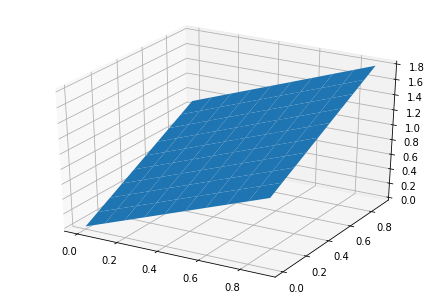

In [101]:
### ТРЁХМЕРНЫЙ ГРАФИК
def makeData():
    x = np.arange(0, 1, 0.1) ## x
    y = np.arange(0, 1, 0.1) ## t
    xgrid, ygrid = np.meshgrid(x, y)

    zgrid = xgrid + ygrid
    return xgrid, ygrid, zgrid

x, y, z = makeData()
fig = plt.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, z)
plt.show()